# 연습
1. csv폴더 안에 num_1 폴더에 있는chipotle.tsv 로드
2. order_id 컬럼의 데이터의 타입을 str로 변경(이유는? 통계요약정보(describe() 숫자형의 데이터만 계산))
3. 가장 많이 주문한 item_name 출력
4. item당 주문 총량의 top10을 바 그래프로 표시
5. item_price의 '$'를 제거하고 데이터 타입을 float 형태로 변경
6. 주문 당 평균 계산 금액 출력

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# csv폴더 안에 num_1 폴더에 있는chipotle.tsv 로드
df = pd.read_csv('../csv/num_1/chipotle.tsv', sep='\t')

In [18]:
# order_id 컬럼의 데이터의 타입을 str로 변경
df['order_id'] = df['order_id'].astype('str')

In [8]:
# 가장 많이 주문한 item_name 출력
group_data = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
# df.groupby('item_name').sum()[['quantity']].sort_values('quantitiy', ascending=False) --> 데이터프레임의 형태에서

group_data.index[0]

'Chicken Bowl'

<Axes: ylabel='item_name'>

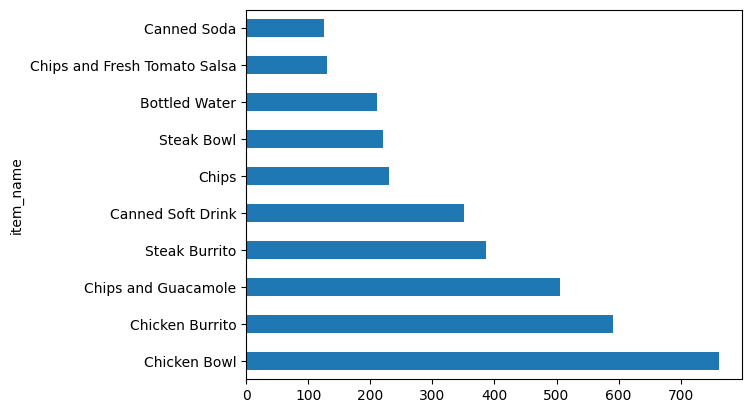

In [9]:
# item당 주문 총량의 top10을 바 그래프로 표시
group_data.head(10).plot.barh()

In [10]:
# item_price의 '$'를 제거하고 데이터 타입을 float 형태로 변경
# case1
df['item_price'] = df['item_price'].str.replace('$','')
#df['item_price'].astype(float)

/var/folders/28/yz261nq91vq_lj47hynw_10r0000gn/T/ipykernel_58710/420543040.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$','')


In [11]:
# case2
df['item_price'].str.lstrip('$')

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [12]:
# case3
def change(x):
    # x의 데이터 타입은? --> object(문자)
    x.replace("%", "")
    # x.lstriP('$')

    df['item_price'].apply(change)

In [13]:
# code4
df['item_price'].apply(lambda y : y.replace('$', ''))


0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [14]:
df['item_price'] = df['item_price'].astype('float')

In [15]:
# 주문 당 평균 계산 금액 출력
df.groupby('order_id').sum()['item_price'].mean()

/var/folders/28/yz261nq91vq_lj47hynw_10r0000gn/T/ipykernel_58710/803442406.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('order_id').sum()['item_price'].mean()


18.811428571428568

In [16]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [17]:
# chicken bowl 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량
# df['quantity'] >= 2, df['item_name'] == Chicken Bowl
df.loc[(df['quantity'] >= 2) & (df['item_name'] == 'Chicken Bowl')]['quantity'].mean()

2.0606060606060606